Yapay Sinir Ağları ile Ev Fiyatı Tahmini

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Örnek ev fiyatı verileri (büyüklük, oda sayısı, fiyat)
data = np.array([
    [50, 2, 150000],
    [60, 3, 180000],
    [70, 3, 210000],
    [80, 4, 250000],
    [90, 4, 280000],
    [100, 5, 320000]
])

# Girişler ve çıkışları ayırma
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

# Verileri standardize etme
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Aktivasyon fonksiyonları
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Hiperparametreler
input_layer_neurons = X.shape[1]  # Giriş katmanındaki nöron sayısı
hidden_layer_neurons = 5  # Gizli katmandaki nöron sayısı
output_neurons = y.shape[1]  # Çıkış katmanındaki nöron sayısı
learning_rate = 0.01  # Öğrenme hızı
epochs = 10000  # Eğitim döngüsü sayısı

# Ağırlıkların başlangıç değeri
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

for epoch in range(epochs):
    # İleri yayılım
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_activation = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_activation, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)

    # Hata hesaplama
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    # Gizli katman hatası
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # Ağırlık güncelleme
    output_weights += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

print("Eğitim tamamlandı")
print("Tahmin edilen çıkışlar:")
print(predicted_output)

def predict(input_data):
    input_data = scaler_X.transform(input_data)  # Veriyi standardize etme
    hidden_layer_input = np.dot(input_data, hidden_weights) + hidden_bias
    hidden_layer_activation = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_activation, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)
    predicted_output = scaler_y.inverse_transform(predicted_output)  # Orijinal ölçeğe geri dönme
    return np.round(predicted_output, 2)

# Manuel test verisi ile test etme
test_data = np.array([[85, 4], [60, 3]])  # Örneğin 85 metrekare ve 4 odalı, 60 metrekare ve 3 odalı evler
predictions = predict(test_data)
print("Tahmin edilen fiyatlar:")
print(predictions)


Eğitim tamamlandı
Tahmin edilen çıkışlar:
[[7.29059076e-04]
 [1.54586517e-03]
 [3.96905019e-03]
 [3.25279130e-01]
 [8.38966965e-01]
 [9.87731177e-01]]
Tahmin edilen fiyatlar:
[[268180.61]
 [231756.54]]


CNN Nesne Sınıflandırma

In [ ]:
!pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Veri setini yükleme ve ön işleme
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Model oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Doğruluğu: {test_acc:.2f}')


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2644 - loss: 1.9697 - val_accuracy: 0.4936 - val_loss: 1.4245
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4477 - loss: 1.5218 - val_accuracy: 0.5618 - val_loss: 1.2553
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4953 - loss: 1.3948 - val_accuracy: 0.5796 - val_loss: 1.2189
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5230 - loss: 1.3211 - val_accuracy: 0.6091 - val_loss: 1.1174
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5514 - loss: 1.2436 - val_accuracy: 0.6332 - val_loss: 1.0796
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5691 - loss: 1.2088 - val_accuracy: 0.6245 - val_loss: 1.0743
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5824 - loss: 1.1716 - val_accuracy: 0.6551 - val_loss: 1.0120
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6026 - loss: 1.1188 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


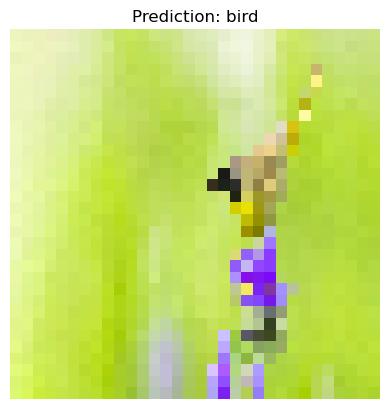

Prediction: bird


In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# CIFAR-10 sınıf isimleri
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizasyon
    return img_array

def plot_image(img_path, predictions_array, class_names):
    img = image.load_img(img_path, target_size=(32, 32))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {class_names[np.argmax(predictions_array)]}")
    plt.show()

# Dosyadan resmi yükleme ve sınıflandırma
img_path = '/home/oz/Desktop/temp/sfdhhskakjfjpg'  # Test etmek istediğiniz resmin yolu
img_array = load_and_preprocess_image(img_path)

predictions = model.predict(img_array)
plot_image(img_path, predictions[0], class_names)

print(f"Prediction: {class_names[np.argmax(predictions)]}")


Nesne Tanıma

In [ ]:
!pip install tensorflow keras pillow

In [18]:
# Boyut ayarlama
from PIL import Image

def resize_image_to_299x299(input_image_path, output_image_path):
    with Image.open(input_image_path) as img:
        resized_img = img.resize((299, 299), Image.ANTIALIAS)
        resized_img.save(output_image_path)
        print(f"Resim başarıyla {output_image_path} olarak kaydedildi.")

# Örnek kullanım
input_image_path = '/home/oz/Desktop/temp/mouse2.jpeg'  # Orijinal resmin yolu
output_image_path = '/home/oz/Desktop/temp/mouse2_.jpg'  # Yeniden boyutlandırılmış resmin kaydedileceği yol
resize_image_to_299x299(input_image_path, output_image_path)

Resim başarıyla /home/oz/Desktop/temp/mouse2_.jpg olarak kaydedildi.


/tmp/ipykernel_3515/2872929735.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_img = img.resize((299, 299), Image.ANTIALIAS)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tahminler:
1: mouse (0.82)
2: modem (0.02)
3: lens_cap (0.01)
4: remote_control (0.00)
5: computer_keyboard (0.00)


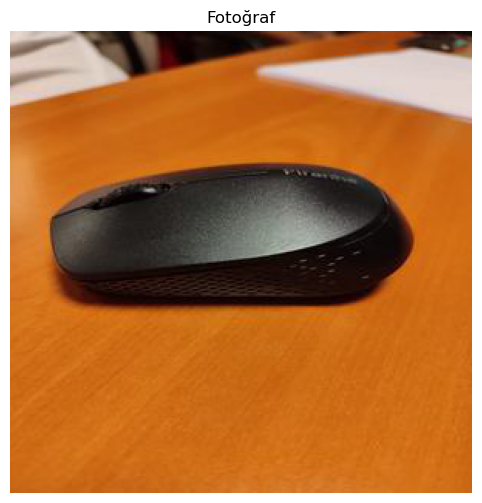

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Modeli yükleme
model = InceptionV3(weights='imagenet')

# Resmi yükleme ve ön işleme
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array, img

# Resmi tanıma ve sonuçları metin olarak yazdırma
def recognize_image(img_path, model):
    img_array, img = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=5)[0]
    
    print("Tahminler:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}: {label} ({score:.2f})")

    # Resmi gösterme
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Fotoğraf")
    plt.show()

# Dosyadan resmi yükleyip tanıma
img_path = '/home/oz/Desktop/temp/mouse2_.jpg'  # Tanınacak resmin yolu
recognize_image(img_path, model)

Sesi Yazıya Çevirme (Speech to Text)

In [ ]:
pip install transformers torchaudio

In [21]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch
import torchaudio

# Model ve işlemciyi yükleme
processor = Wav2Vec2Processor.from_pretrained("ceyda/wav2vec2-large-xlsr-53-turkish")
model = Wav2Vec2ForCTC.from_pretrained("ceyda/wav2vec2-large-xlsr-53-turkish")
model.to("cuda" if torch.cuda.is_available() else "cpu")

def speech_file_to_array_fn(path):
    speech_array, sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(sampling_rate, 16000)
    speech = resampler(speech_array).squeeze().numpy()
    return speech

def predict(path):
    speech = speech_file_to_array_fn(path)
    inputs = processor(speech, sampling_rate=16000, return_tensors="pt", padding=True)
    inputs = {key: inputs[key].to("cuda" if torch.cuda.is_available() else "cpu") for key in inputs}

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    return transcription[0]

# Örnek ses dosyasını sınıflandırma
audio_path = "/home/oz/Desktop/temp/ses2.wav"  # Test etmek istediğiniz ses dosyasının yolu
transcription = predict(audio_path)
print(f"Transcription: {transcription}")


Ignored unknown kwarg option normalize
Ignored unknown kwarg option normalize
Ignored unknown kwarg option normalize
Ignored unknown kwarg option normalize


Some weights of the model checkpoint at ceyda/wav2vec2-large-xlsr-53-turkish were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at ceyda/wav2vec2-large-xlsr-53-turkish and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably

Transcription: bu kod neden çalışmıyorbindos ayarlarının ve gerek ütman elerin kurulmasılazm
